In [1]:
import pandas as pd

# Load dataset (replace with your file name)
df = pd.read_csv("Emoji - emoji_dataset - Untitled spreadsheet - emoji_dataset.csv")

# Fix any typos in column names
df = df.rename(columns={'acutal emoji': 'actual emoji'})

# See your data
print(df)


                             sentence actual emoji predicted emoji
0             Taha is yawning all day            😴               😴
1    Taha likes CyberGen AI Boot Camp            🎉               🎉
2               I am unsure right now            🤔               🤔
3      I felt happy when my code runs            😂               😂
4                         I am sleepy            😴               😴
..                                ...          ...             ...
195               Cats is my favorite           ❤️              ❤️
196               I like dogs so much           ❤️              ❤️
197                I am annoyed again            😡               😡
198              I am furious so much            😡               😡
199            I am heartbroken again            😢               😢

[200 rows x 3 columns]


In [2]:
X = df['sentence']        # Features (text)
y = df['actual emoji']    # Target (emoji)


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [6]:
y_pred = clf.predict(X_test_tfidf)

# Store predictions in the DataFrame
df.loc[X_test.index, 'predicted emoji'] = y_pred


In [7]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


Accuracy: 0.89


D:\JupyterProject\.ipynb_checkpoints\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\JupyterProject\.ipynb_checkpoints\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\JupyterProject\.ipynb_checkpoints\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
D:\JupyterProject\.ipynb_checkpoints\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\JupyterProject\.ipynb_checkpoints\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129300 (\N{THINKING FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\JupyterProject\.ipynb_

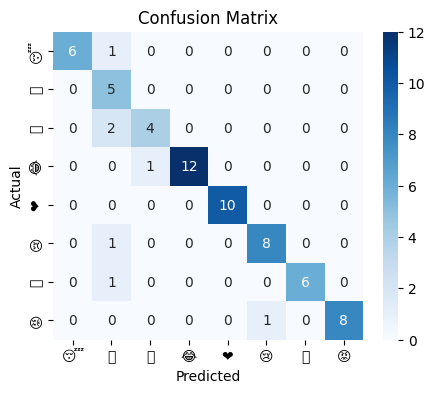

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = clf.predict(X_test_tfidf)

# Store predictions in the DataFrame
df.loc[X_test.index, 'predicted emoji'] = y_pred

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=df['actual emoji'].unique())

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=df['actual emoji'].unique(),
            yticklabels=df['actual emoji'].unique(),
            cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [11]:
for sent, actual, pred in zip(X_test, y_test, y_pred):
    print(f"Sentence: {sent}")
    print(f"Actual: {actual} | Predicted: {pred}")
    print("-" * 1)


Sentence: I approve from me
Actual: 👍 | Predicted: 🎉
-
Sentence: That good job
Actual: 👍 | Predicted: 👍
-
Sentence: So irritated about this
Actual: 😡 | Predicted: 😡
-
Sentence: Still wondering
Actual: 🤔 | Predicted: 🎉
-
Sentence: That nice work
Actual: 👍 | Predicted: 👍
-
Sentence: I'm lol nonstop
Actual: 😂 | Predicted: 😂
-
Sentence: Hmm again
Actual: 🤔 | Predicted: 🤔
-
Sentence: Can't stop laughing at that prank
Actual: 😂 | Predicted: 😂
-
Sentence: Massive success!
Actual: 🎉 | Predicted: 🎉
-
Sentence: I am unsure again
Actual: 🤔 | Predicted: 🤔
-
Sentence: I'm yawning again
Actual: 😴 | Predicted: 😴
-
Sentence: I appreciate music
Actual: ❤️ | Predicted: ❤️
-
Sentence: Still lol about the reel
Actual: 😂 | Predicted: 😂
-
Sentence: I am exhausted
Actual: 😴 | Predicted: 😴
-
Sentence: I am blue so much
Actual: 😢 | Predicted: 😢
-
Sentence: Feeling really rough day
Actual: 😢 | Predicted: 😢
-
Sentence: Blue made me cry
Actual: 😢 | Predicted: 😢
-
Sentence: This makes me irritated
Actual: 😡 | Pred